[ref]:
- https://towardsdatascience.com/how-to-get-stock-data-using-python-c0de1df17e75

In [133]:
import seaborn as sns
sns.set()

In [1]:
import numpy as np
import pandas as pd

In [4]:
import yfinance as yf

#get data on this ticker
tickerData = yf.Ticker('MSFT')

In [5]:
tickerData

yfinance.Ticker object <MSFT>

In [39]:
#get the historical prices for this ticker
ticker_df= tickerData.history(interval='1d', start='2010-1-1', end='2021-5-01')

In [40]:
ticker_df.info()
ticker_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2852 entries, 2009-12-31 to 2021-04-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2852 non-null   float64
 1   High          2852 non-null   float64
 2   Low           2852 non-null   float64
 3   Close         2852 non-null   float64
 4   Volume        2852 non-null   int64  
 5   Dividends     2852 non-null   float64
 6   Stock Splits  2852 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 178.2 KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,24.073285,24.081056,23.684755,23.684755,31929700,0.0,0
2010-01-04,23.793539,24.166527,23.770227,24.049969,38409100,0.0,0
2010-01-05,23.972268,24.166532,23.809084,24.057743,49749600,0.0,0
2010-01-06,23.995573,24.150985,23.715832,23.910097,58182400,0.0,0
2010-01-07,23.801302,23.855697,23.459397,23.661432,50559700,0.0,0


In [41]:
#info on the company
# tickerData.info

In [42]:
#get event data for ticker
tickerData.calendar

,0,1
Earnings Date,2021-07-20 00:00:00,2021-07-26 00:00:00
Earnings Average,1.90,1.90
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,43994300000,43994300000
Revenue Low,40850000000,40850000000
Revenue High,45019500000,45019500000


In [43]:
#get recommendation data for ticker
grade = tickerData.recommendations

In [44]:
grade['To Grade'].value_counts()

Buy               93
Overweight        70
Outperform        64
Neutral           37
Hold              14
Sell              10
Market Perform    10
Strong Buy         9
Underperform       6
Equal-Weight       6
Sector Perform     2
Underweight        2
                   1
Long-Term Buy      1
Perform            1
Name: To Grade, dtype: int64

<AxesSubplot:title={'center':'Stock price'}, xlabel='Date'>

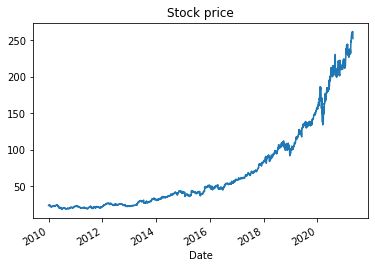

In [45]:
ticker_df['Close'].plot(title="Stock price")

In [46]:
tickerData.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,72.37%,% of Shares Held by Institutions
2,72.42%,% of Float Held by Institutions
3,5249,Number of Institutions Holding Shares


In [47]:
tickerData.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",614100233,2020-12-30,0.0815,136588173823
1,Blackrock Inc.,515509179,2020-12-30,0.0684,114659551593
2,State Street Corporation,299126371,2020-12-30,0.0397,66531687437
3,"FMR, LLC",222257473,2020-12-30,0.0295,49434507144
4,Price (T.Rowe) Associates Inc,177500157,2020-12-30,0.0236,39479584919
5,"Geode Capital Management, LLC",117798162,2020-12-30,0.0156,26200667192
6,Capital World Investors,110441260,2020-12-30,0.0147,24564345049
7,Capital Research Global Investors,95506129,2020-12-30,0.0127,21242473212
8,Capital International Investors,91995988,2020-12-30,0.0122,20461747650
9,Northern Trust Corporation,91215100,2020-12-30,0.0121,20288062542


## yf download`

In [153]:
stocks = ['AAPL', 'MSFT', 'QQQ', 'SPY',]

In [183]:
new_stocks = [
    'spy',
    #'aapl',
    'brk-b',
    #'TSLA', 
    'XPEV', 
    #'NFLX',
    'arkk'
             ]

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:title={'center':'Daily price'}, xlabel='Date'>

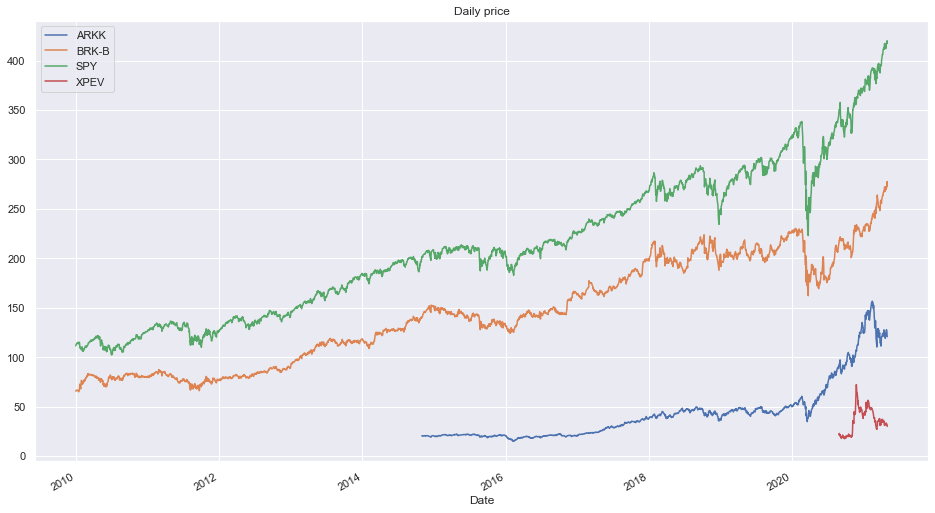

In [184]:
res = yf.download(new_stocks,'2010-01-01','2021-10-10')['Close']
res.plot(figsize=(16,9), title='Daily price')

## trend analysis

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = res['QQQ'].values
result = seasonal_decompose(series, model='additive',period=1)

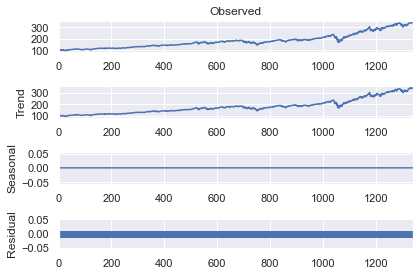

In [140]:
result.plot()
plt.show()